In [1]:
from RAT_env import *
from NashAgent_lib import *
from NashRL import *
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import csv


Initialize enviroment for the training

Aps positions: [[-53.903909015736474, -73.51013902809649], [-14.068101259819832, -49.73223559483188], [26.32679848419318, -65.05811746566758], [-42.50577811102384, 2.247074030160835], [-13.977968897965166, 4.463284193795435], [65.47152283389133, -24.67506201609695], [-34.709037408359606, 59.906969749411346], [-7.987474174100406, 32.773974990589075], [72.86065361033906, 41.82972725563134]]
LTE SNs positions: [[-51.021495057829355, -74.06209667914999], [47.813599438841976, -66.62959731941915], [-47.382329468849534, 62.87623077835917], [70.9567337889317, 40.760206223603106]]


c:\Users\alvar\Documents\TELECO\cuarto\Thesis\Nash_DQN_RAT_new_channel\RAT_env.py:305: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(position[0], position[1], c=color, label=f'User (RAT {rat})', s=10)


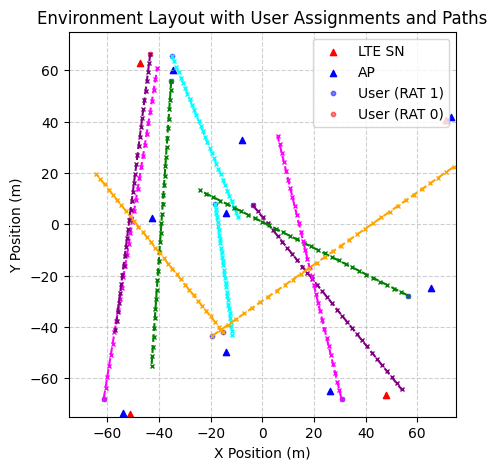

In [2]:
# Parameters for the Multi-RAT Network
area_width = 150
n_aps = 9
n_users = 10
n_steps = 30

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)


rat_env = Multi_RAT_Network(area_width, n_users, n_aps, n_steps, plot=True)

Train the Nash Agent

In [3]:
import time
from datetime import date

start = time.time()

str_dt = date.today().strftime("%d%m%Y")
nash_agent, loss_data, last_rats, episode_rewards, best_actions,eps_list,episode_length= \
    run_Nash_Agent(rat_env, max_steps=n_steps, nash_agent=None, sim_steps=100000,
                    exploration_fraction = 0.5, buffer_size=10000,AN_file_name="Action_Net",
                    VN_file_name="Value_Net",rv_min=.01, rv_max=2.5,
                    path='/pt_files/Nash_DQN/',early_stop=False, early_lim=1000)

print("Total time taken: ")
print(time.time() - start)

Simulation Progress:  20%|██        | 20004/100000 [06:06<27:32, 48.41it/s]

Weights saved to disk (Checkpoint)
Iteration 20000 A_Loss: 0.12339507043361664


Simulation Progress:  30%|███       | 30010/100000 [09:15<22:17, 52.33it/s]

Iteration 30000 A_Loss: 0.26576557755470276


Simulation Progress:  40%|████      | 40008/100000 [12:52<20:43, 48.23it/s]

Weights saved to disk (Checkpoint)
Iteration 40000 A_Loss: 0.49952617287635803


Simulation Progress:  50%|█████     | 50010/100000 [16:07<14:14, 58.53it/s]

Iteration 50000 A_Loss: 0.7468694448471069


Simulation Progress:  60%|██████    | 60008/100000 [19:12<09:57, 66.91it/s]

Weights saved to disk (Checkpoint)
Iteration 60000 A_Loss: 0.5551032423973083


Simulation Progress:  70%|███████   | 70008/100000 [22:17<09:01, 55.43it/s]

Iteration 70000 A_Loss: 0.5363131165504456


Simulation Progress:  80%|████████  | 80011/100000 [25:12<05:23, 61.74it/s]

Weights saved to disk (Checkpoint)
Iteration 80000 A_Loss: 1.0747746229171753


Simulation Progress:  90%|█████████ | 90012/100000 [28:04<02:32, 65.71it/s]

Iteration 90000 A_Loss: 0.6202147603034973


Simulation Progress: 100%|██████████| 100000/100000 [30:43<00:00, 54.24it/s]


Weights saved to disk (Checkpoint)
csv imported
Saving final weights to disk
Weights saved to disk
Total time taken: 
1846.458306312561


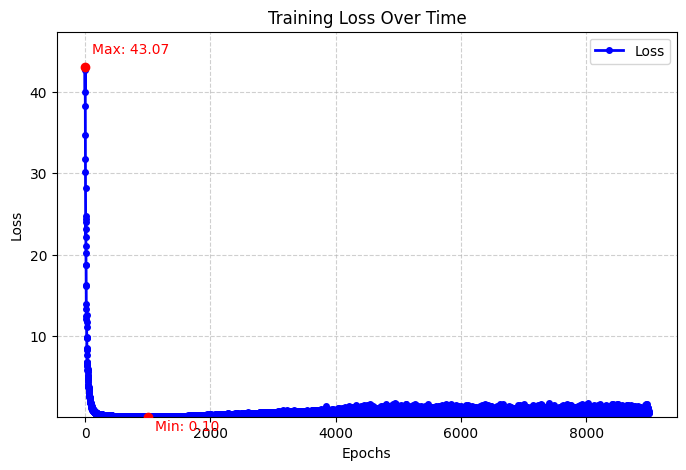

In [4]:
plt.figure(figsize=(8, 5)) 

plt.plot(loss_data, label="Loss", color="blue", linewidth=2, marker="o", markersize=4)

plt.ylim(np.min(loss_data) * 0.9, np.max(loss_data) * 1.1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

min_idx = np.argmin(loss_data)
max_idx = np.argmax(loss_data)

plt.scatter([min_idx, max_idx], [loss_data[min_idx], loss_data[max_idx]], color="red", zorder=3)
plt.annotate(f"Min: {loss_data[min_idx]:.2f}", (min_idx, loss_data[min_idx]), 
             textcoords="offset points", xytext=(5, -10), ha="left", color="red")
plt.annotate(f"Max: {loss_data[max_idx]:.2f}", (max_idx, loss_data[max_idx]), 
             textcoords="offset points", xytext=(5, 10), ha="left", color="red")

plt.show()


c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


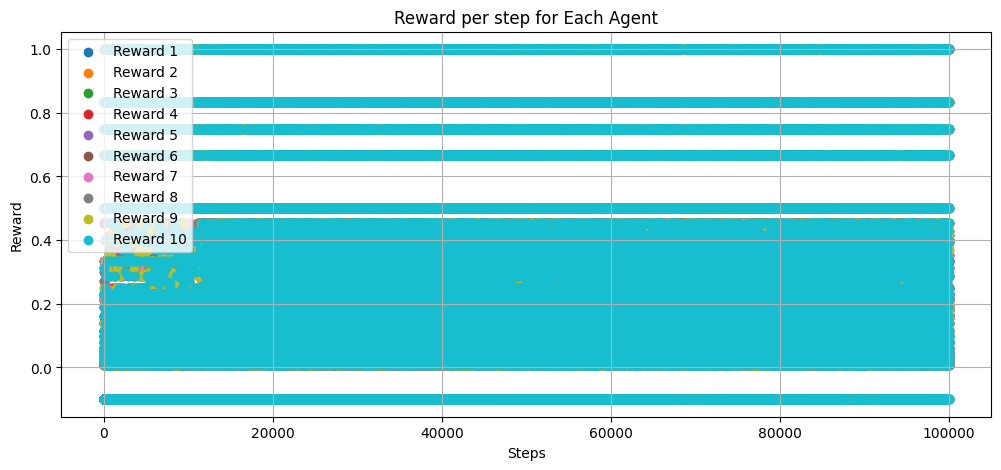

In [5]:
steps = []
rewards = [[] for _ in range(n_users)]

with open('rewards.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        steps.append(int(row["step"]) + 1)
        for j in range(n_users):
            rewards[j].append(float(row[f"reward_{j+1}"]))

plt.figure(figsize=(12,5))

agents_plotted = n_users
for j in range(agents_plotted):
    plt.scatter(steps, rewards[j], label=f"Reward {j+1}")
    
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.title("Reward per step for Each Agent")
plt.legend()
plt.grid()
plt.show()

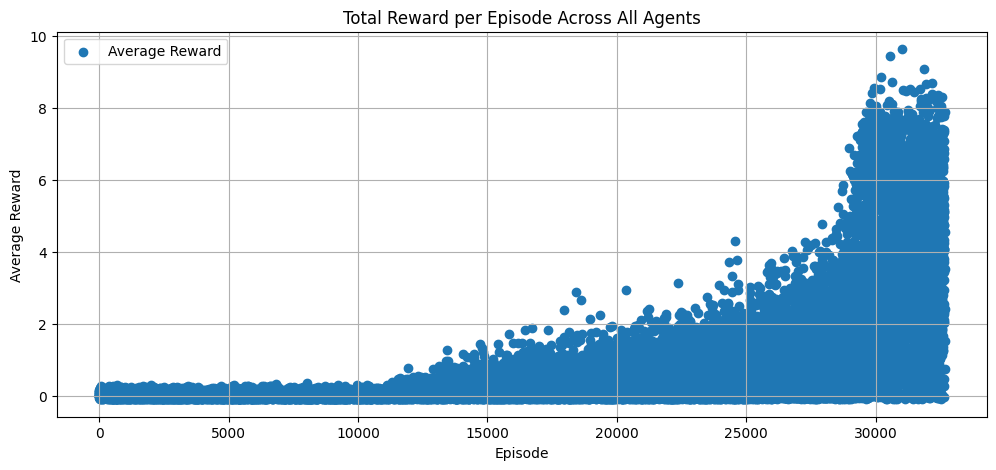

In [6]:
episode_rewards = np.array(episode_rewards)

# Calculate the average reward across all agents for each episode
average_rewards = np.mean(episode_rewards, axis=1)

plt.figure(figsize=(12, 5))

# Plot the average reward per episode across all agents
plt.scatter(range(episode_rewards.shape[0]), average_rewards, label="Average Reward")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Total Reward per Episode Across All Agents")
plt.legend()
plt.grid()
plt.show()

Reward for each agent

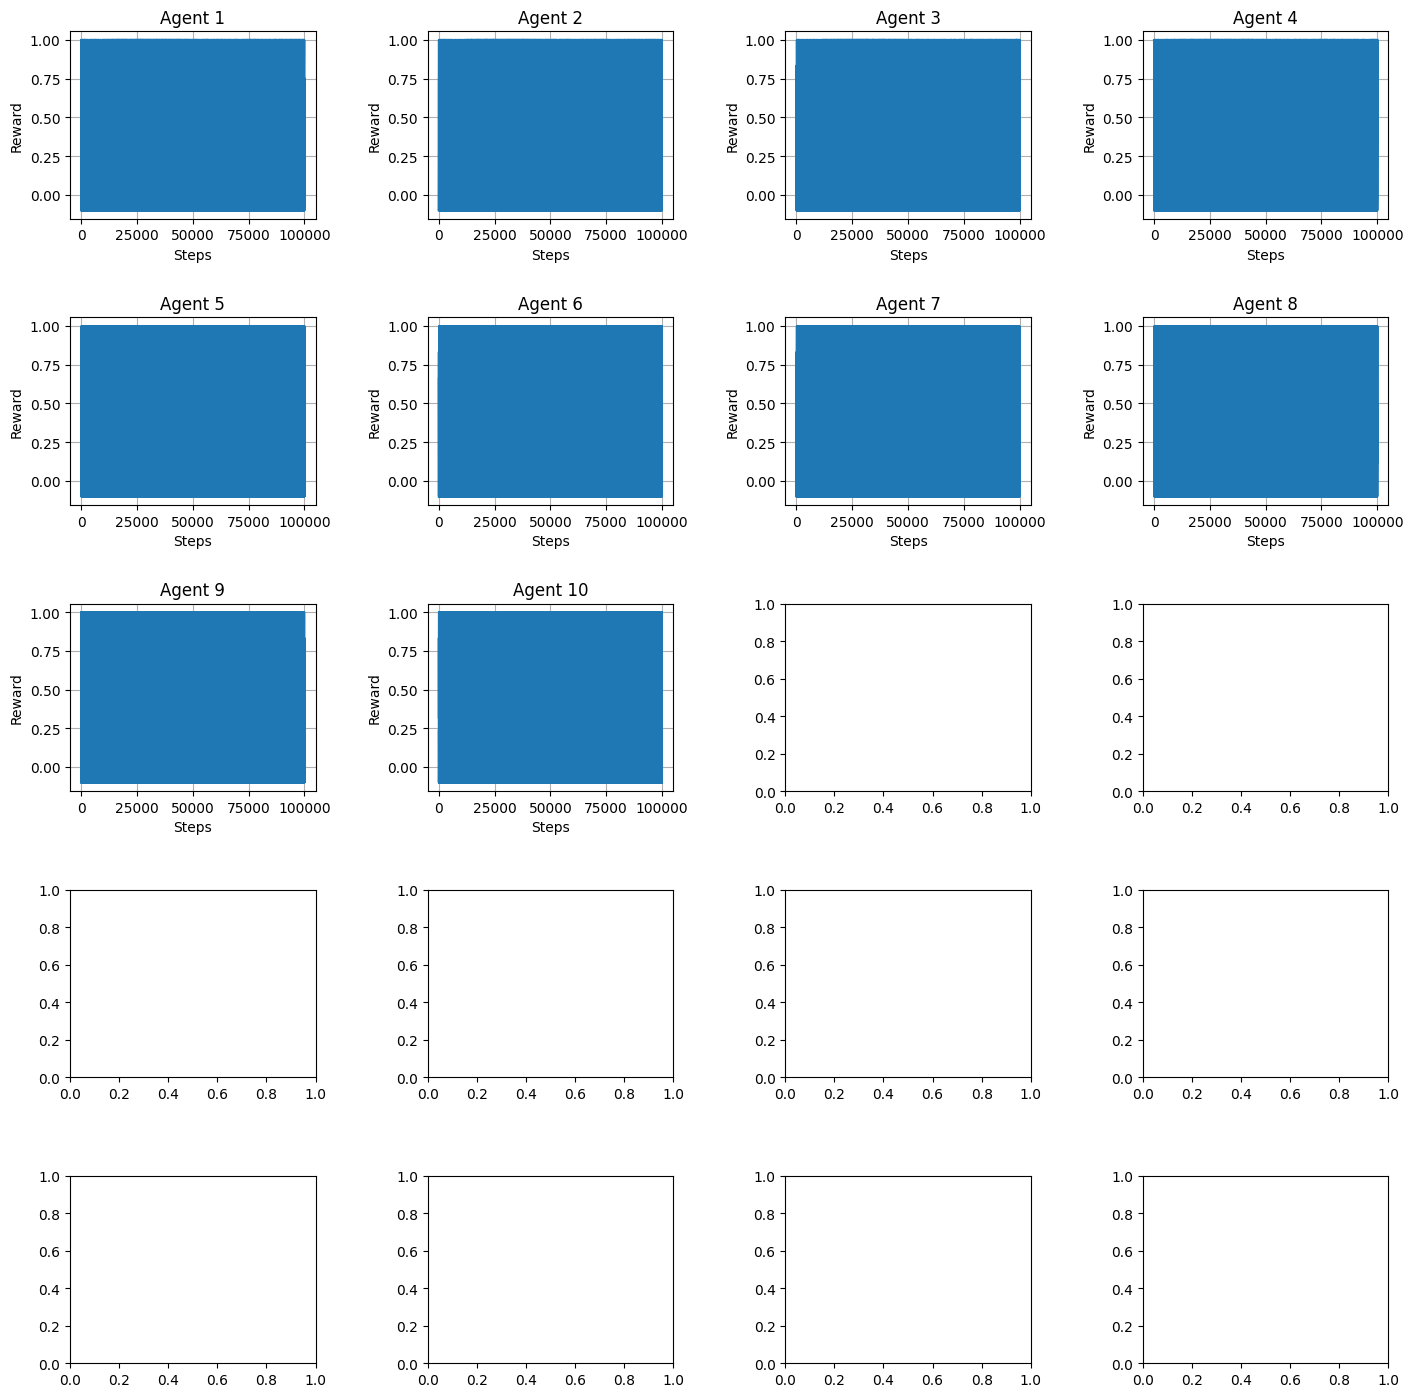

In [7]:
steps = []
rewards = [[] for _ in range(n_users)]  # Adjusting to 20 agents

# Read rewards data from the CSV file
with open('rewards.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        steps.append(int(row["step"]) + 1)
        for j in range(n_users):  # Loop over 20 agents
            rewards[j].append(float(row[f"reward_{j+1}"]))

# Create a 5x4 grid of subplots for 20 agents
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
fig.tight_layout(pad=5.0)  # Add space between plots

# Flatten the 2D axes array to make it easier to loop through
axes = axes.flatten()

# Plot rewards for each agent in its own subplot
for j in range(n_users):
    ax = axes[j]
    ax.plot(steps, rewards[j])
    ax.set_title(f"Agent {j+1}")
    ax.set_xlabel("Steps")
    ax.set_ylabel("Reward")
    ax.grid(True)

plt.show()

Text(0.5, 1.0, 'Bar Plot of Rat Values')

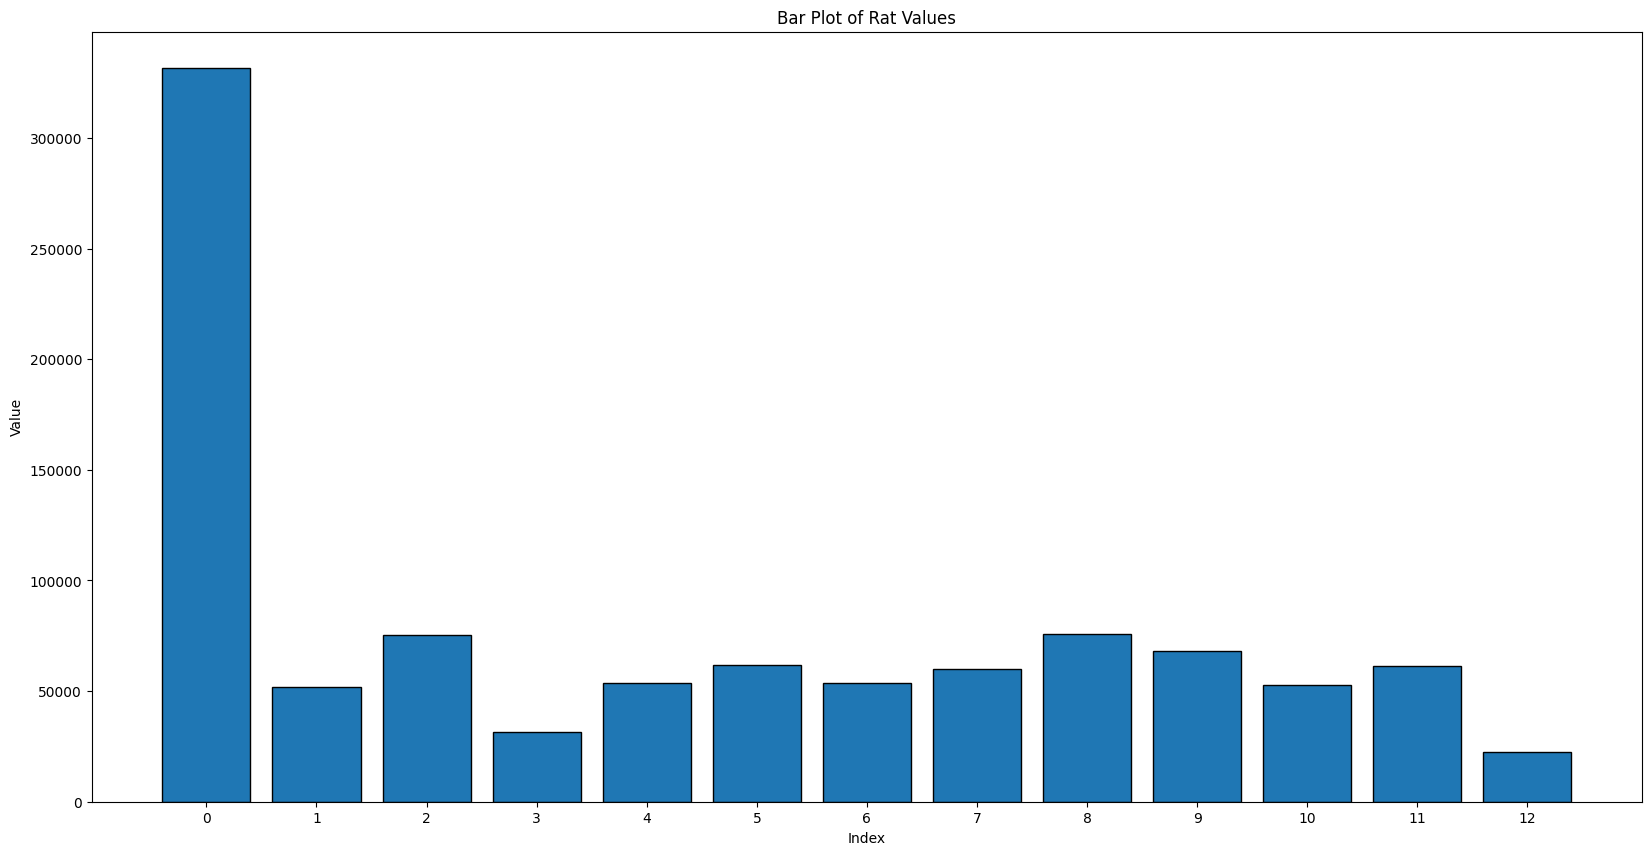

In [8]:
plt.figure(figsize=(20, 10))
plt.bar(range(len(last_rats)), last_rats, edgecolor='black')


plt.xlabel('Index')
plt.xticks(range(len(last_rats))) 
plt.ylabel('Value')
plt.title('Bar Plot of Rat Values')



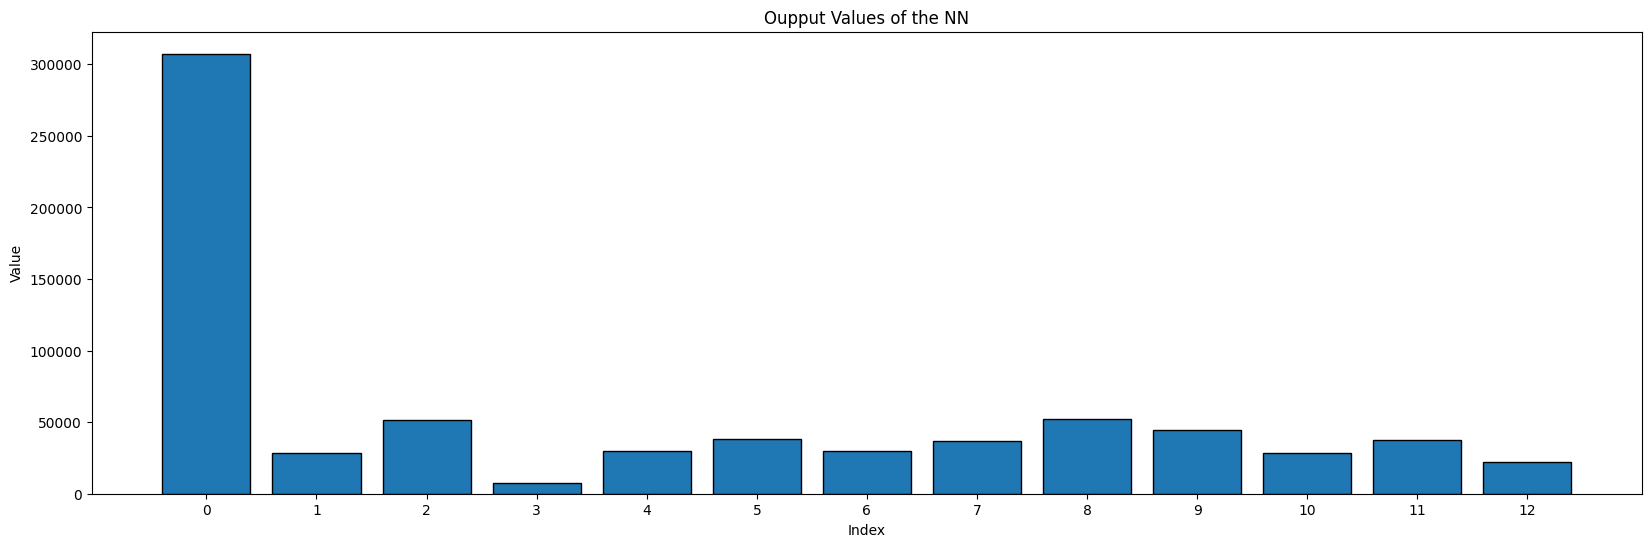

In [9]:
plt.figure(figsize=(20, 6))

plt.bar(range(len(last_rats)), best_actions, edgecolor='black')
plt.xlabel('Index')
plt.xticks(range(len(best_actions))) 
plt.ylabel('Value')
plt.title('Oupput Values of the NN')

plt.show()

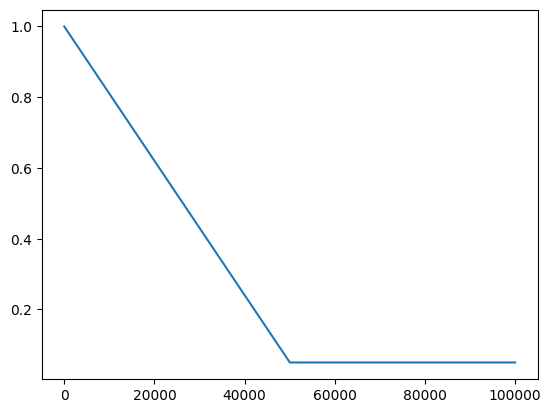

In [10]:
plt.plot(eps_list)

Text(0.5, 1.0, 'Episode Length Over Time')

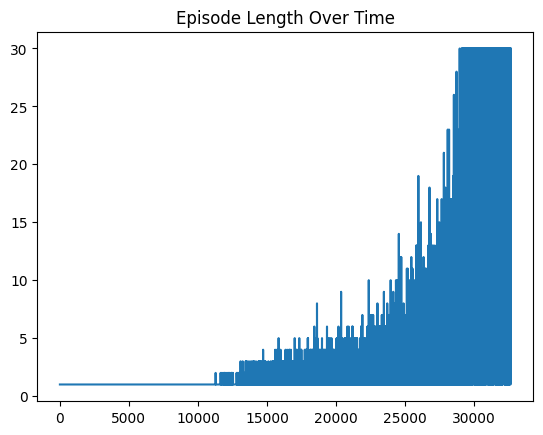

In [11]:
plt.plot(episode_length)
plt.title("Episode Length Over Time")